In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def humanize(word):
  """
  convert _ and lowercase to more formal Uppercase and spaces
  """
  word = word.lower()
  word = word.replace("_", " ")
  word = word.title()
  return word

humanize("a_brown_fox")

'A Brown Fox'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# dataset
subscriber_info = pd.read_csv("https://github.com/connoralydon/rosetta_stone_final/raw/main/data/rosetta_stone_clean.csv")


In [4]:
# Validating variables
subscriber_info['demo_user'].value_counts()

False    26224
True     13878
Name: demo_user, dtype: int64

In [ ]:
# Validating variables
subscriber_info['lead_platform'].value_counts()

App        15071
Unknown    12581
Web        12450
Name: lead_platform, dtype: int64

In [ ]:
# Validating variables
subscriber_info['total_app_interactions'].value_counts()

0.0      17189
4.0       1011
5.0        969
3.0        907
6.0        905
         ...  
291.0        1
363.0        1
646.0        1
654.0        1
272.0        1
Name: total_app_interactions, Length: 451, dtype: int64

In [ ]:
# Validating variables 
subscriber_info['subscription_type_lifetime'].value_counts()

0    33557
1     6545
Name: subscription_type_lifetime, dtype: int64

In [ ]:
# Calulating quartiles and median of subscription_length_days (output => [Q1, Median, Q3])
np.percentile(subscriber_info['subscription_length_days'], [25, 50, 75]) 

array([ 95., 282., 419.])

In [ ]:
# Add long_time_subscriber column. Default is No
# Source: https://datagy.io/pandas-conditional-column/
subscriber_info['long_time_subscriber'] = False # No

In [ ]:
# Update long_time_subscriber column based on conditional
subscriber_info.loc[subscriber_info['subscription_length_days'] > 420, 'long_time_subscriber'] = True # Yes

In [ ]:
# Validate new column, long_time_subscriber
subscriber_info['long_time_subscriber'].value_counts()

False    30084
True     10018
Name: long_time_subscriber, dtype: int64

### **Question 3**

### **Visualizations & Takeaways**

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


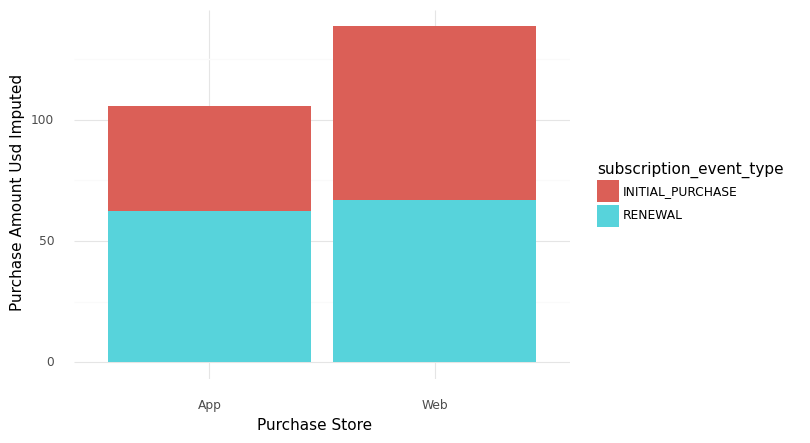

<ggplot: (8738283327885)>

In [ ]:
# plot
(ggplot(subscriber_info, aes(x = "purchase_store", y = "purchase_amount_usd_imputed", fill = "subscription_event_type")) + 
 geom_bar(stat = "summary") + theme_minimal() +
 ylab(humanize("purchase_amount_usd_imputed")) +
 xlab(humanize("purchase_store"))
 )

Majority of high-spending users utilize the web application. Additionally, most users have an 'initial purchase' subscription type, rather than renewal. Users with an 'inital purchase' subscription type spend more money. Perhaps they are willing to spend even more with targeted emails and push notifications. This leads to the next graphs.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


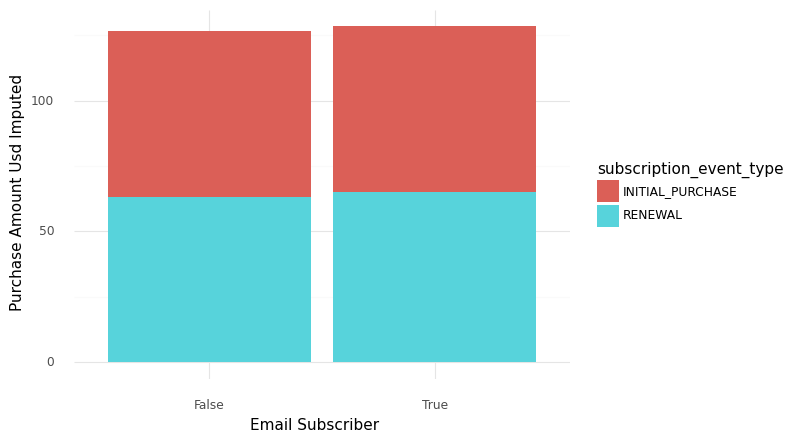

<ggplot: (8738281130565)>

In [ ]:
# plot
(ggplot(subscriber_info, aes(x = "email_subscriber", y = "purchase_amount_usd_imputed", fill = "subscription_event_type")) + 
 geom_bar(stat = "summary") + theme_minimal() +
 ylab(humanize("purchase_amount_usd_imputed")) +
 xlab(humanize("email_subscriber"))
 )

Here, we see that email subscriptions have almost zero correlation to a user purchasing more products because these two categorizes have almost identical results. Takeaway: Rosetta Stone needs to emphasize its email marketing agenda to increase revenue.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


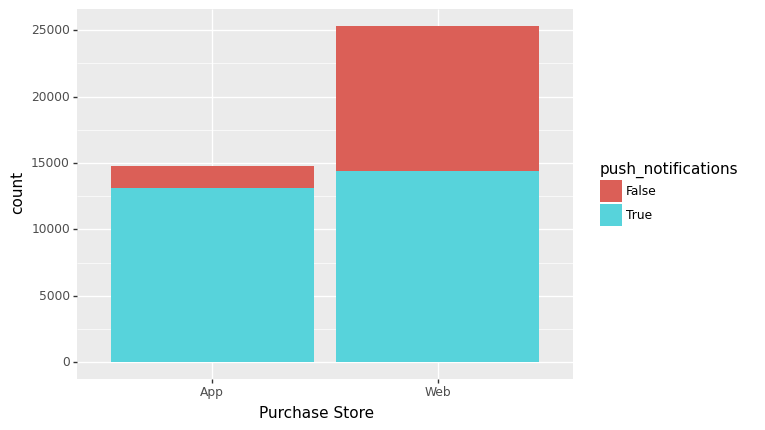

<ggplot: (8738280820229)>

In [ ]:
# plot
(ggplot(subscriber_info, aes(x = "purchase_store", fill = "push_notifications")) + 
 geom_bar() +
 xlab(humanize("purchase_store"))
 )

There are more users on the app version that have push notifications enabled. With a boost in push notification quality, maybe these users will spend more. **Next I will investigate users with push notifications enabled and their relationship with total app interactions, email subscriber, and long time user.**

## **Users with Push Notifications Enabled Are More Likely to Purchase Additional Products**





In [ ]:
subscriber_info.groupby(["push_notifications"])[["total_app_interactions"]].mean()

,total_app_interactions
push_notifications,
False,0.002384
True,28.709099


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


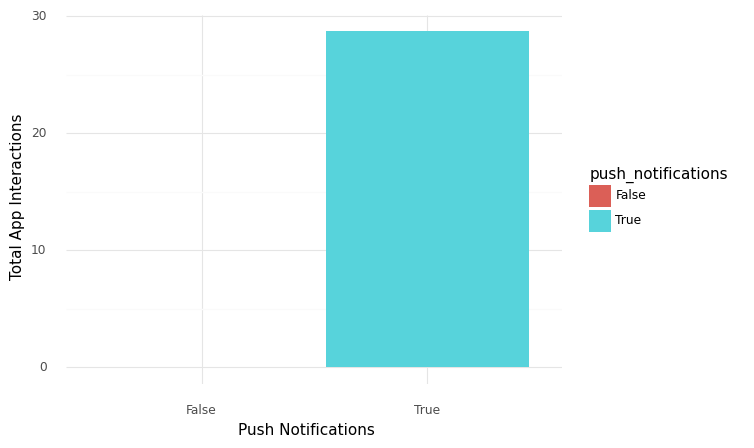

<ggplot: (8738283290293)>

In [ ]:
# plot
(ggplot(subscriber_info, aes(x = "push_notifications", y = "total_app_interactions", fill = "push_notifications")) + 
 geom_bar(stat = 'summary') + theme_minimal() +
 ylab(humanize("total_app_interactions")) + 
 xlab(humanize("push_notifications"))
 )

Based on the table and graph above, users without push notifications enabled hardly interact with the application. So, we only want to focus on users with push notifications enabled. **Hence, users with push notifications enabled can certainly be sold additional products because they are the only ones using the application.**

In [ ]:
subscriber_info.groupby(["push_notifications"])[["email_subscriber"]].mean()

,email_subscriber
push_notifications,
False,0.000000
True,0.707028


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


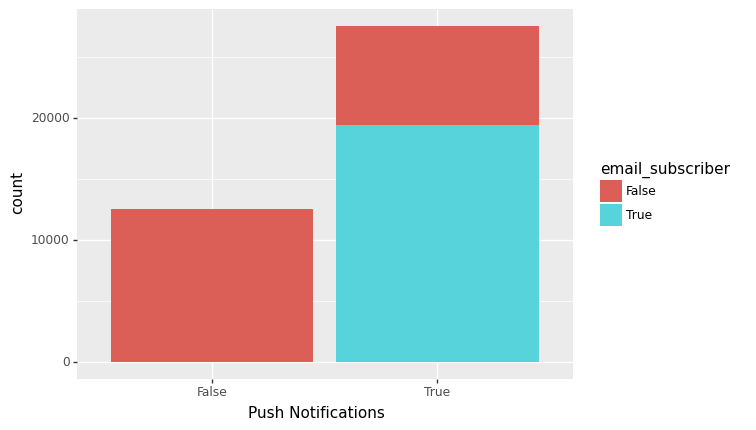

<ggplot: (8738280820281)>

In [ ]:
# plot
(ggplot(subscriber_info, aes(x = "push_notifications", fill = "email_subscriber")) + 
 geom_bar() + 
 xlab(humanize("push_notifications"))
 )

Users that do not have push notifications enabled are certainly not email subscribers. Yet again, users with push notifications are critical. 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


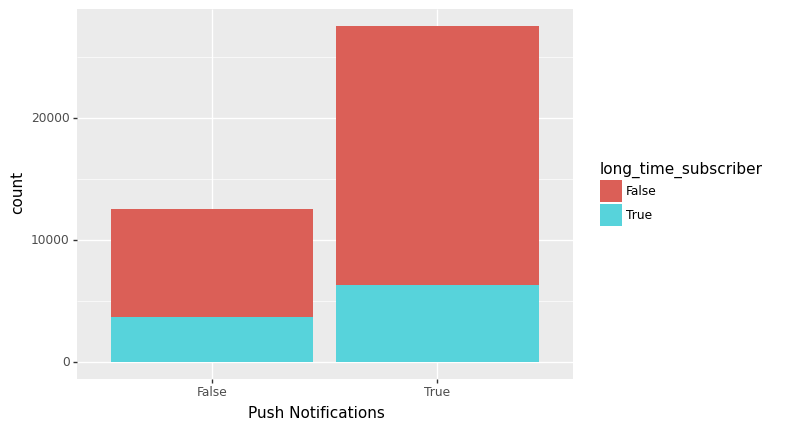

<ggplot: (8738280796321)>

In [ ]:
# plot
(ggplot(subscriber_info, aes(x = "push_notifications", fill = "long_time_subscriber")) + 
 geom_bar() + 
 xlab(humanize("push_notifications"))
 )

## **Long Term Subscribers Spend More Money**

In [ ]:
subscriber_info.groupby(["long_time_subscriber"])[["purchase_amount_usd_imputed"]].mean()

,purchase_amount_usd_imputed
long_time_subscriber,
False,38.490913
True,139.086738


## **Conclusion: Long Term Subscribers with Push Notifications Enabled are Ideal Users to Sell Additional Products**

## **Free Trial Users are Essentially Worthless**

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


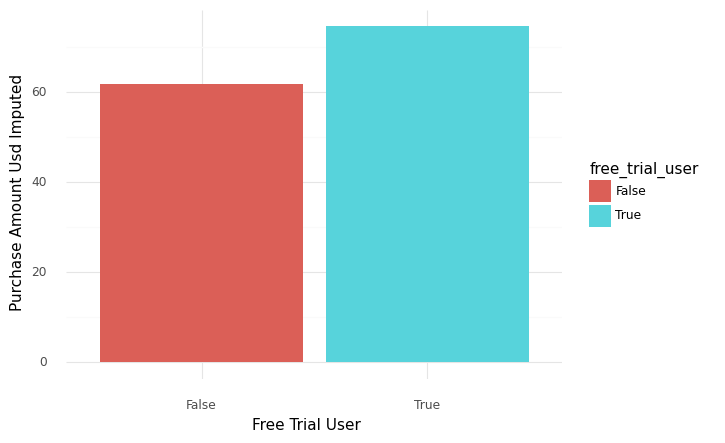

<ggplot: (8738280724561)>

In [ ]:

(ggplot(subscriber_info, aes(x = "free_trial_user", y = "purchase_amount_usd_imputed", fill = "free_trial_user")) + 
 geom_bar(stat = "summary") + theme_minimal() +
 ylab(humanize("purchase_amount_usd_imputed")) +
 xlab(humanize("free_trial_user"))
 )

Free trial users spend a little more than non-free trial users. But this isn't statistically significant.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


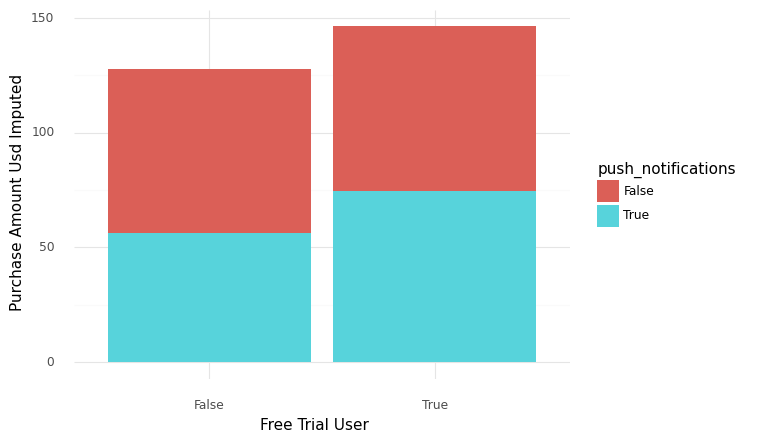

<ggplot: (8738280726425)>

In [ ]:
(ggplot(subscriber_info, aes(x = "free_trial_user", y = "purchase_amount_usd_imputed", fill = "push_notifications")) + 
 geom_bar(stat = "summary") + theme_minimal() +
 ylab(humanize("purchase_amount_usd_imputed")) +
 xlab(humanize("free_trial_user"))
 )

Free trial users are essentially meaningless. Takeaway: Rosetta Stone needs a better free trial.

In [ ]:
subscriber_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40102 entries, 0 to 40101
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   40102 non-null  int64  
 1   language                     40102 non-null  object 
 2   subscription_event_type      40102 non-null  object 
 3   purchase_store               40102 non-null  object 
 4   subscription_start_date      40102 non-null  object 
 5   demo_user                    40102 non-null  bool   
 6   free_trial_user              40102 non-null  bool   
 7   auto_renew                   40102 non-null  bool   
 8   country                      40102 non-null  object 
 9   user_type                    40102 non-null  object 
 10  lead_platform                40102 non-null  object 
 11  email_subscriber             40102 non-null  bool   
 12  push_notifications           40102 non-null  bool   
 13  send_count      

In [ ]:
subscriber_info['country'].value_counts()
subscriber_info['purchase_store'].value_counts()
subscriber_info['email_subscriber'].value_counts()

False    20646
True     19456
Name: email_subscriber, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


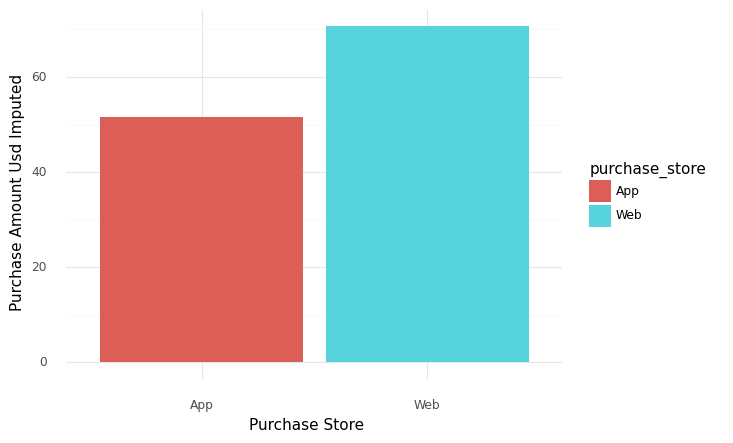

<ggplot: (8759730031165)>

In [15]:

(ggplot(subscriber_info, aes(x = "purchase_store", y = "purchase_amount_usd_imputed", fill = "purchase_store")) + 
 geom_bar(stat = "summary") + theme_minimal() +
 ylab(humanize("purchase_amount_usd_imputed")) +
 xlab(humanize("purchase store"))
 )

Users with push notifications enabled spend more money than those who don't. This is behavior Rosetta Stone can take advantage of. 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


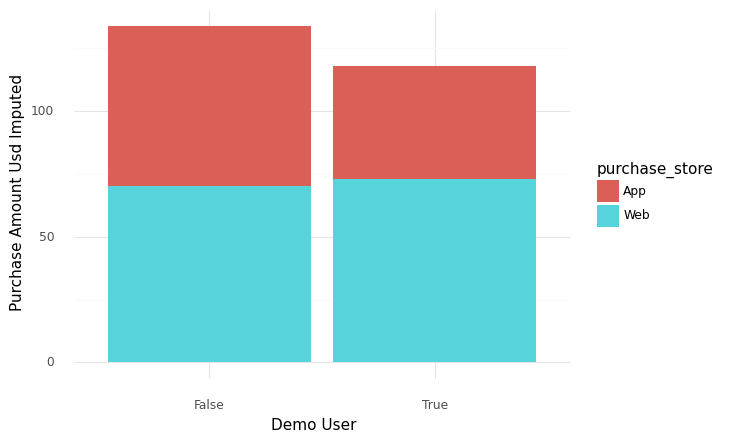

<ggplot: (8738280731985)>

In [ ]:

(ggplot(subscriber_info, aes(x = "demo_user", y = "purchase_amount_usd_imputed", fill = "purchase_store")) + 
 geom_bar(stat = "summary") + theme_minimal() +
 ylab(humanize("purchase_amount_usd_imputed")) +
 xlab(humanize("demo_user"))
 )

Since demo users don't contribute much to purchase amount then this is a an area that Rosetta Stone can improve upon: make the demo better.

### **Logistic Regression to predict long_time_subscriber (Ignore)**

In [ ]:

predictors = ['total_app_interactions', 'purchase_amount_usd_imputed', 'unique_open_count', 'unique_click_count', 'launch_app_interactions']

X_train, X_test, y_train, y_test = train_test_split(subscriber_info[predictors], subscriber_info["long_time_subscriber"], test_size=0.2)


zscore = StandardScaler()
zscore.fit(X_train)
Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)

In [ ]:
myLogit = LogisticRegression() #create

In [ ]:
myLogit.fit(Xz_train,y_train) #fit

LogisticRegression()

In [ ]:
predictedVals = myLogit.predict(Xz_test) #predict

In [ ]:
# model accuracy score 
accuracy_score(y_test,predictedVals)

0.8857997755890786

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Text(0.5, 1.0, 'Confusion matrix of the classifier')

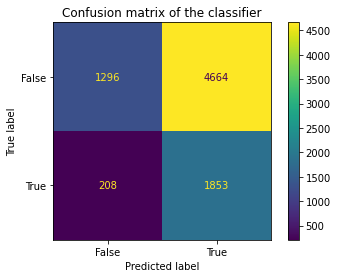

In [ ]:
plot_confusion_matrix(myLogit,X_test, y_test)
plt.title('Confusion matrix of the classifier')

**Logistic Regression Coefficient Intepretation**

In [ ]:
coef = pd.DataFrame({"Coefs": myLogit.coef_[0],
                     "Names": predictors})
coef = coef.append({"Coefs": myLogit.intercept_[0],
                    "Names": "intercept"}, ignore_index = True)
coef

,Coefs,Names
0,-0.514468,total_app_interactions
1,1.665859,purchase_amount_usd_imputed
2,0.001927,unique_open_count
3,0.107394,unique_click_count
4,0.582117,launch_app_interactions
5,-1.473741,intercept


In [ ]:
coef["Odds Coefs"] = np.exp(coef["Coefs"])
coef

,Coefs,Names,Odds Coefs
0,-0.514468,total_app_interactions,0.597818
1,1.665859,purchase_amount_usd_imputed,5.290213
2,0.001927,unique_open_count,1.001928
3,0.107394,unique_click_count,1.113372
4,0.582117,launch_app_interactions,1.789823
5,-1.473741,intercept,0.229067


Any odds coefficient greater than 1 means the odds of being a longtime subscriber increase. For example, if launch_app_interactions increases by 1 standard deviation (because I z-scored), the odds the user will be a long time subscriber are multiplied by 1.750564. 

### **Question #2**

### **K-Means to find patterns among users**

In [5]:
# Set up
features = ['total_app_interactions', 
            'launch_app_interactions', 
            'subscription_length_days', 
            'purchase_amount_usd_imputed', 
            'unique_open_count', 
            'unique_click_count']

X = subscriber_info[features]

z = StandardScaler()

X[features] = z.fit_transform(X[features])




/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
# Choosing the perfect K 
ks = [2,3,4,5,6,7,8,9,10]

sse = [] # sum of squared errors
sils = [] # silhouette score

for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(X)
    
    sse.append(km.inertia_) # average distance between point and its center
    sils.append(silhouette_score(X, km.predict(X)))
    
sse_df = pd.DataFrame({"K": ks,
                      "sse": sse,
                      "silhouette": sils})


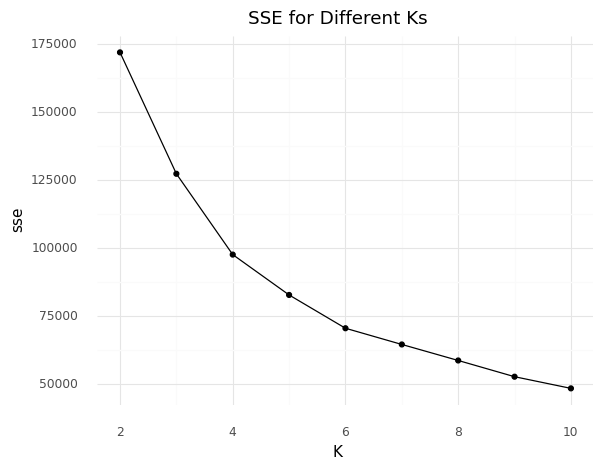

<ggplot: (8738280485013)>

In [ ]:
(ggplot(sse_df, aes(x = "K", y = "sse")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "SSE for Different Ks"))

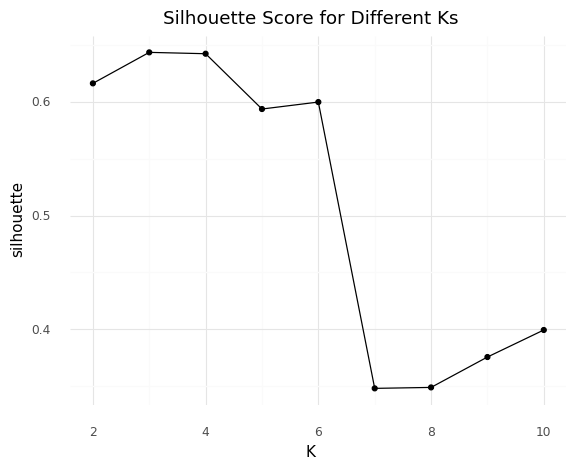

<ggplot: (8738280484881)>

In [ ]:
# sil
(ggplot(sse_df, aes(x = "K", y = "silhouette")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette Score for Different Ks"))

In [6]:
# model

km = KMeans(n_clusters = 4) # determined by the above two graphs
km.fit(X)

membership = km.predict(X)
X["cluster"] = membership

# model silhouette score close to 1 indicates that clusters are cohesive and separate, which is good. 
print(silhouette_score(X[features], membership))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0.6423299777239215


In [7]:
# add clusters to dataset
subscriber_info['cluster'] = membership

In [8]:
# validate clusters were added to dataset
subscriber_info.head()

,Unnamed: 0,language,subscription_event_type,purchase_store,subscription_start_date,demo_user,free_trial_user,auto_renew,country,user_type,...,unique_open_count,unique_click_count,purchase_amount_usd,subscription_length_days,subscription_type_lifetime,subscription_type_limited,total_app_interactions,launch_app_interactions,purchase_amount_usd_imputed,cluster
0,0,POR,INITIAL_PURCHASE,App,2018-12-28,True,False,False,US/Canada,Consumer,...,6.0,0.0,NaN,182,0,1,14.0,12.0,10.064357,0
1,1,EBR,INITIAL_PURCHASE,Web,2019-11-28,False,False,False,Other,Consumer,...,1.0,0.0,39.0,92,0,1,80.0,27.0,39.000000,0
2,2,ESP,INITIAL_PURCHASE,Web,2018-12-31,False,False,False,US/Canada,Consumer,...,0.0,0.0,0.0,365,0,1,78.0,39.0,0.000000,0
3,3,KOR,INITIAL_PURCHASE,App,2019-11-07,True,False,False,US/Canada,Consumer,...,0.0,0.0,NaN,92,0,1,38.0,15.0,13.975346,0
4,4,ENG,INITIAL_PURCHASE,App,2019-08-13,False,False,False,US/Canada,Consumer,...,5.0,1.0,NaN,92,0,1,152.0,63.0,6.399365,3


# **Summarize Clusters**

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


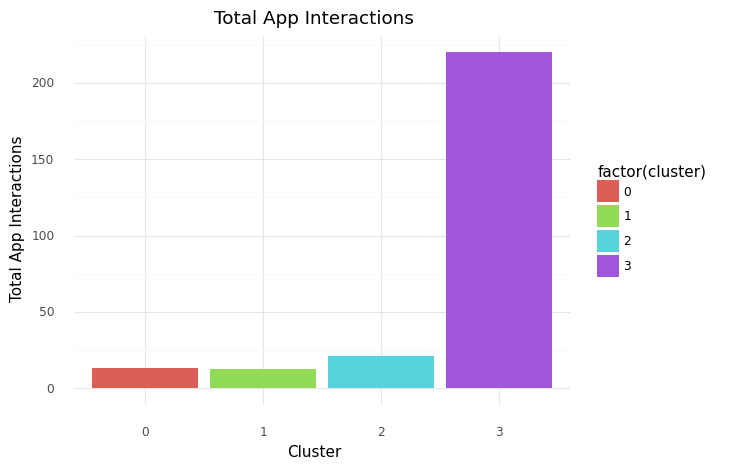

<ggplot: (8759737954909)>


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


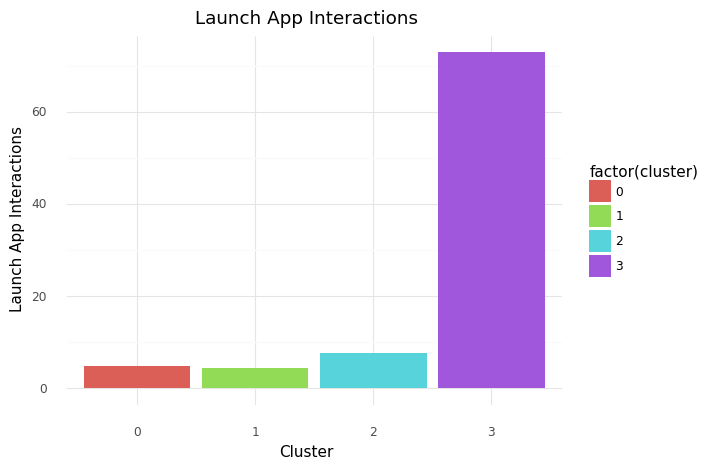

<ggplot: (8759730517669)>


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


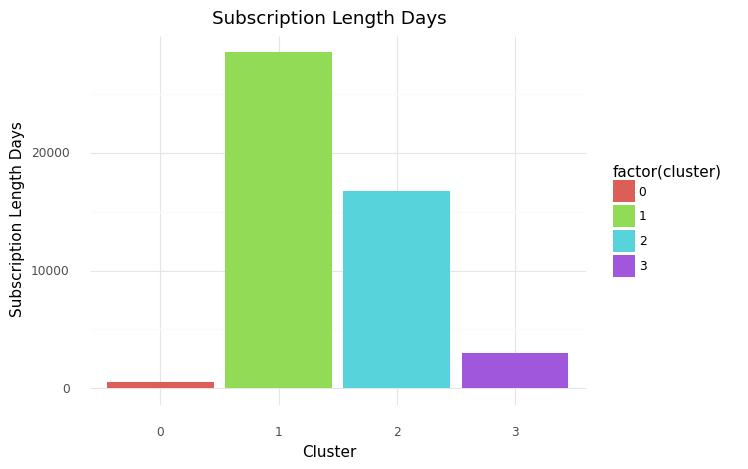

<ggplot: (8759730138441)>


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


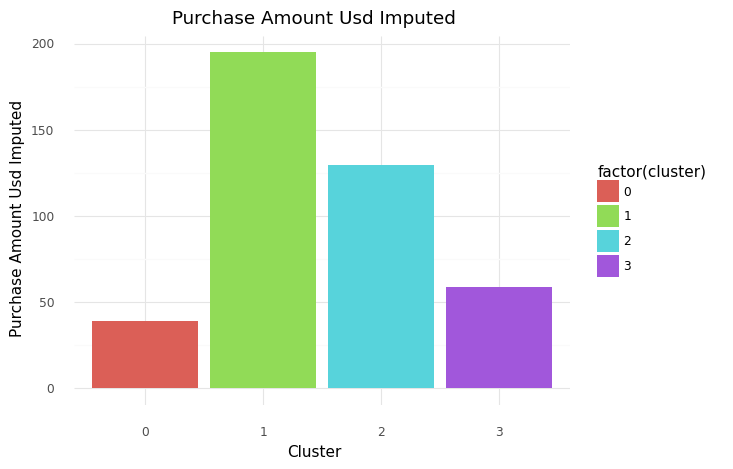

<ggplot: (8759730142117)>


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


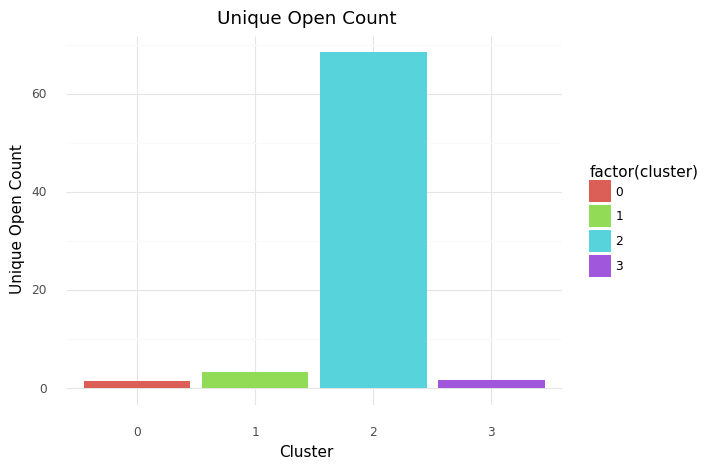

<ggplot: (8759730498389)>


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


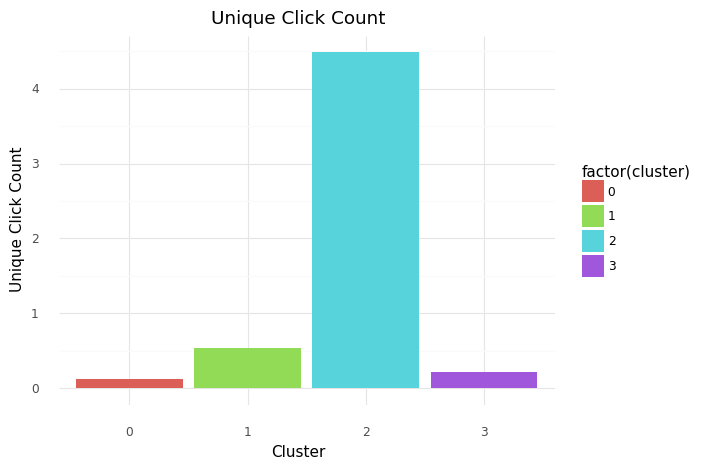

<ggplot: (8759730078417)>


In [9]:
# Each cluster's relationship with a feature

for f in features:
  print(ggplot(subscriber_info, aes(x = "factor(cluster)", y = f,
                          fill = "factor(cluster)")) +
      geom_bar(stat = "summary") + 
        theme_minimal() + 
      labs(x = 'Cluster', y = humanize(f), title = humanize(f)))


In [10]:
subscriber_info.groupby("cluster").mean()[['total_app_interactions', 
            'launch_app_interactions', 
            'subscription_length_days', 
            'purchase_amount_usd_imputed', 
            'unique_open_count', 
            'unique_click_count']]

# Sidenote: cluster 0 is the biggest. Replacing mean() with count() demonstrates this.            

,total_app_interactions,launch_app_interactions,subscription_length_days,purchase_amount_usd_imputed,unique_open_count,unique_click_count
cluster,,,,,,
0,13.222068,4.938093,550.851061,39.026719,1.402855,0.123690
1,12.867670,4.483999,28526.529493,195.210134,3.313441,0.544715
2,21.301242,7.686335,16741.322981,130.006578,68.433230,4.482919
3,220.040290,72.917808,2964.879936,59.006360,1.614021,0.223207


## **Cluster's Takeaway**

**Cluster 0**: These users are essentially inactive. They have low ratings across all features. 

**Cluster 1**: These are users that do not use the app much - indicated by their low total app interactions and launch app interactions - but are quite valuable when they *do* use the application.

**Cluster 2**: These are users that go on the application lots but don't actually contribute much at all. They just like to waste time. 

**Cluster 3**: These users hardly use the app. But they have the longest subscription length and highest purchase amount, so they are still valuable. 

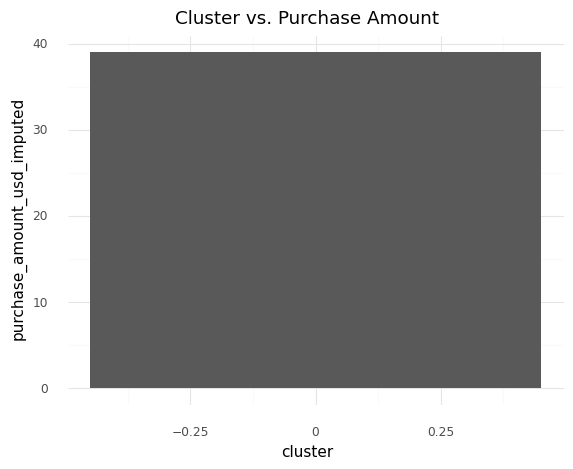

<ggplot: (8759728000681)>

In [13]:
clusterZero = subscriber_info.loc[subscriber_info['cluster'] == 0]

(ggplot(clusterZero, aes(x = 'cluster', y = "purchase_amount_usd_imputed")) + geom_bar(stat = 'summary') + theme_minimal() + labs(title = "Cluster vs. Purchase Amount"))


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


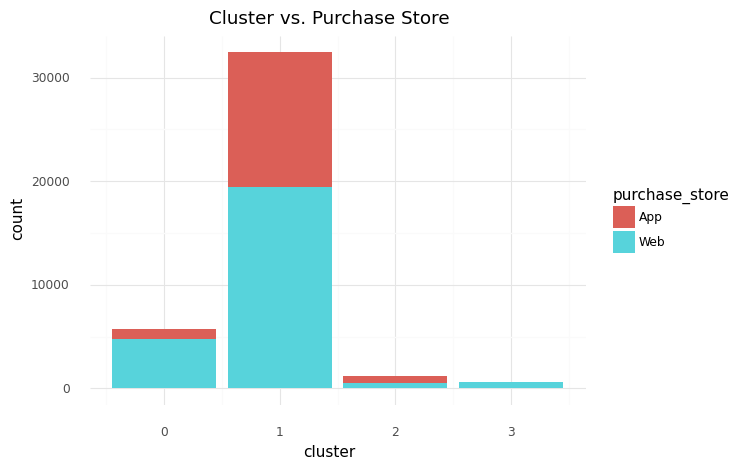

<ggplot: (8738274531681)>

In [ ]:
(ggplot(subscriber_info, aes(x = "cluster", fill = "purchase_store")) + geom_bar() + theme_minimal() + labs(title = "Cluster vs. Purchase Store"))
